<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/Binary_classification_for_Good_%26_Bad_dataset_with_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/train.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/images 1/images/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/test.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/images 1/images/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant images have been moved
good_dataset folder created and relevant ima

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


model=Sequential()

#convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#i/p layer
model.add(Flatten())


#o/p layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

#compile model:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(train_ds,epochs=30,validation_data=validation_ds)

Found 163 files belonging to 2 classes.
Found 69 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                         

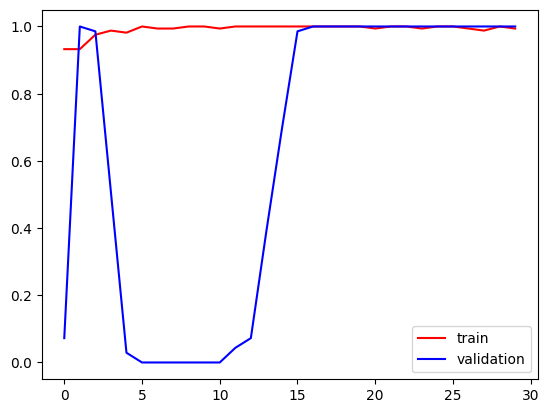

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

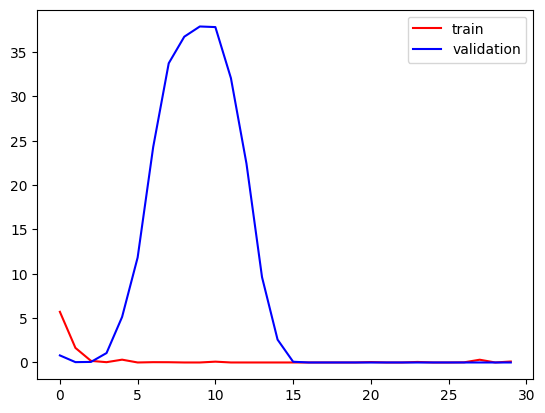

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

(3000, 4000, 3)

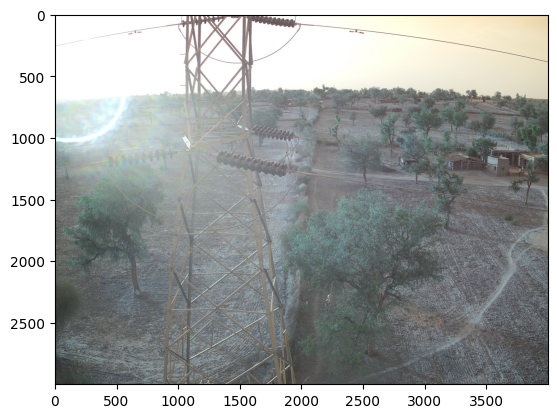

In [ ]:
import cv2
test_img=cv2.imread(r'/content/gdrive/MyDrive/dataset/images 1/images/DJI_0553.jpg')
plt.imshow(test_img)
test_img.shape


In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

(3000, 4000, 3)

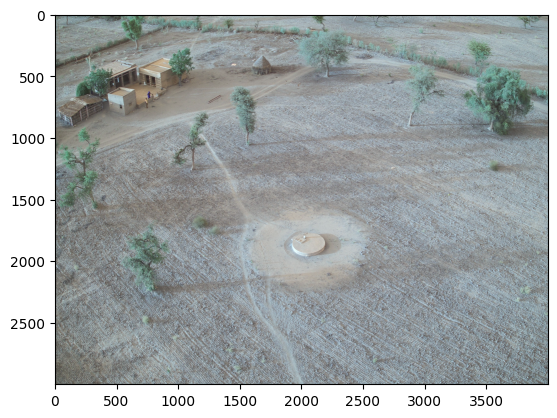

In [ ]:
import cv2
test_img1=cv2.imread(r'/content/gdrive/MyDrive/dataset/images 1/images/DJI_0609.jpg')
plt.imshow(test_img1)
test_img1.shape


In [ ]:
test_img1=cv2.resize(test_img1,(256,256))
test_input1=test_img1.reshape((1,256,256,3))
model.predict(test_input1)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)